In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#plt.style.use("seaborn-paper")
sns.set(style="whitegrid")

filename_pre = 'Result190730/190730_'
filename = filename_pre + 'ResultsSummary.xlsx'

In [65]:
def comparision(criterion,frequency):
    alternative_method_list = ['FARLSTM','FAR','CNN1D','LSTM','MLP','AR','SAR','VAR','lightGBM']
    method = 'FARCNN'
    level = 'node' #node/type
    filename = filename_pre + method + '.xlsx'
    sheetname  = frequency + '_' + level + '_average'
    df = pd.read_excel(filename,header=0,sheet_name=sheetname)
    results = df.loc[:,['Unnamed: 0','node','type',criterion]]
    results.columns = ['Node Index','node','type',method]
    for method in alternative_method_list:
        level = 'node' #node/type
        filename = filename_pre + method+'.xlsx'
        sheetname  = frequency + '_' + level + '_average'
        df = pd.read_excel(filename,header=0,sheet_name=sheetname)
        df = df.loc[:,['Unnamed: 0','node','type',criterion]]
        df.columns = ['Node Index','node','type',method]
        results = pd.merge(results,df,on=['Node Index','node','type'])
    results = results.rename(columns={'CNN1D':'CNN','lightGBM':'LightGBM'})
    results =  results[['Node Index','node','type','FARCNN','FARLSTM','CNN','LSTM','MLP','AR','SAR','VAR','FAR','LightGBM']]
    return results

In [52]:
results = comparision('MAPE','Daily')

In [53]:
# Mean
pd.pivot_table(results, index=['type'], aggfunc='mean',values = ['FARCNN','FARLSTM','FAR','CNN','LSTM','MLP','AR','SAR','VAR','LightGBM'])

,AR,CNN,FAR,FARCNN,FARLSTM,LSTM,LightGBM,MLP,SAR,VAR
type,,,,,,,,,,
Border,0.112466,0.123193,0.108773,0.115285,0.156256,0.122376,0.280513,0.257082,0.108626,0.110547
Industry,0.148886,0.128212,0.134560,0.119304,0.135733,0.127431,0.262856,0.258312,0.140489,0.148959
Municipal,0.090765,0.091610,0.091203,0.082027,0.153214,0.078936,0.303703,0.367990,0.085447,0.090533


In [54]:
# Median
pd.pivot_table(results, index=['type'], aggfunc=np.median,values = ['FARCNN','FARLSTM','FAR','CNN','LSTM','MLP','AR','SAR','VAR','LightGBM'])

,AR,CNN,FAR,FARCNN,FARLSTM,LSTM,LightGBM,MLP,SAR,VAR
type,,,,,,,,,,
Border,0.094906,0.110101,0.099140,0.099298,0.137618,0.104981,0.250558,0.180097,0.095805,0.095559
Industry,0.097102,0.099069,0.093112,0.083709,0.111261,0.080170,0.213416,0.229525,0.092823,0.097427
Municipal,0.079571,0.078050,0.082463,0.068761,0.080371,0.059289,0.317203,0.389752,0.075677,0.079623


In [55]:
# Geometry Mean
pd.pivot_table(results, index=['type'],aggfunc=lambda x:np.prod(x)**(1.0/len(x)),values = ['FARCNN','FARLSTM','FAR','CNN','LSTM','MLP','AR','SAR','VAR','LightGBM'])

,AR,CNN,FAR,FARCNN,FARLSTM,LSTM,LightGBM,MLP,SAR,VAR
type,,,,,,,,,,
Border,0.091108,0.099167,0.090716,0.092228,0.136220,0.097603,0.266407,0.212181,0.087242,0.088303
Industry,0.100169,0.096790,0.094624,0.085883,0.098307,0.086148,0.189231,0.205736,0.095735,0.100106
Municipal,0.082053,0.082438,0.080715,0.071551,0.088996,0.067848,0.281595,0.346831,0.076737,0.081929


In [56]:
results.columns

Index(['Node Index', 'node', 'type', 'FARCNN', 'FARLSTM', 'CNN', 'LSTM', 'MLP',
       'AR', 'SAR', 'VAR', 'FAR', 'LightGBM'],
      dtype='object')

In [57]:
results.median()

Node Index    45.500000
FARCNN         0.072376
FARLSTM        0.086242
CNN            0.081623
LSTM           0.064379
MLP            0.367831
AR             0.082106
SAR            0.077883
VAR            0.081569
FAR            0.082932
LightGBM       0.288088
dtype: float64

In [58]:
results.loc[results['type'] == 'Industry','type'] = 'Plant'

In [59]:
results.head()

,Node Index,node,type,FARCNN,FARLSTM,CNN,LSTM,MLP,AR,SAR,VAR,FAR,LightGBM
0,0,S1335949845,Municipal,0.048971,0.050041,0.069246,0.051777,0.168705,0.061954,0.057654,0.062179,0.058019,0.149096
1,1,S1808946565,Plant,0.252399,0.337917,0.268491,0.300948,0.333819,0.262713,0.284816,0.258182,0.287771,0.422103
2,2,S1877081582,Border,0.174083,0.263449,0.167087,0.222939,0.308853,0.178582,0.173494,0.192099,0.153510,0.272033
3,3,S2936071850,Municipal,0.118477,0.146700,0.110041,0.102981,0.189039,0.110883,0.116800,0.111090,0.126326,0.166944
4,4,S322229464,Plant,0.166814,0.174734,0.139648,0.118235,0.316194,0.186086,0.176950,0.186824,0.214305,0.260876


In [73]:
def box_plots(results,frequency):
    
    type_list = ['Border','Plant','Municipal']
    for types in type_list:
        subtype = results[results['type'] == types]
        subtype_result = subtype.iloc[:,3:]

        boxplot_GAP = subtype_result.values
        labels = subtype_result.columns.values
        print(labels)

        # plt.boxplot(boxplot_GAP, labels=labels,showmeans=True,vert = False,showfliers=False)
        # plt.xlim(-0.005,0.7)
        # plt.axvline(0.1,linestyle='-.',alpha=0.5)
        # plt.show();

        medianprops = dict(linewidth=2.5)
        plt.boxplot(boxplot_GAP, labels=labels,showmeans=True,vert = False,showfliers=False,medianprops= medianprops)
        plt.xlim(-0.005,0.7)
        #plt.axvline(0.1,linestyle='-.',alpha=0.5)
        plt.title("%s %s MAPE"%(types,frequency))
        plt.yticks(fontweight='bold')
        #plt.axvline(Municipal_result.mean().mean())
        plt.tight_layout()
        plt.savefig("Graph/Boxplot%s%s"%(types,frequency))
        plt.show();
        
#         medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
#         medianpointprops = dict(marker='o', markeredgecolor='black',markerfacecolor='firebrick',linestyle='none',markersize=12)
#         #meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
#         meanlineprops = dict(linestyle='--', color='green')
#         flierprops = dict(marker='+', markersize=3)
#         plt.boxplot(boxplot_GAP,flierprops=flierprops,patch_artist= True,labels=labels,showmeans=True,vert = False,showfliers=False,medianprops= medianprops)#,meanprops=meanlineprops, meanline=True)
#         #plt.xlim(-0.2,6)
#         plt.xlabel('Hourly MAPE')
#         plt.show();

['FARCNN' 'FARLSTM' 'CNN' 'LSTM' 'MLP' 'AR' 'SAR' 'VAR' 'FAR' 'LightGBM']


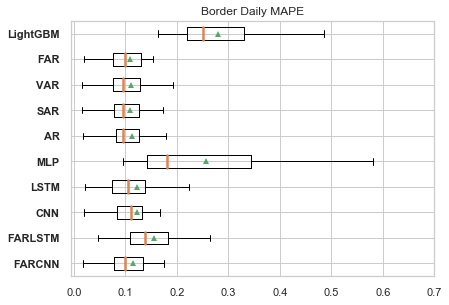

['FARCNN' 'FARLSTM' 'CNN' 'LSTM' 'MLP' 'AR' 'SAR' 'VAR' 'FAR' 'LightGBM']


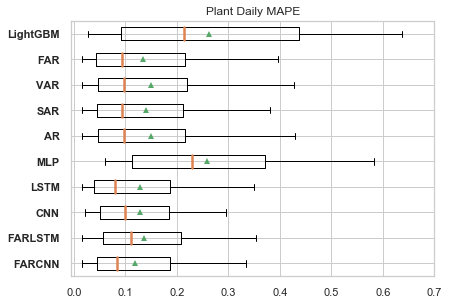

['FARCNN' 'FARLSTM' 'CNN' 'LSTM' 'MLP' 'AR' 'SAR' 'VAR' 'FAR' 'LightGBM']


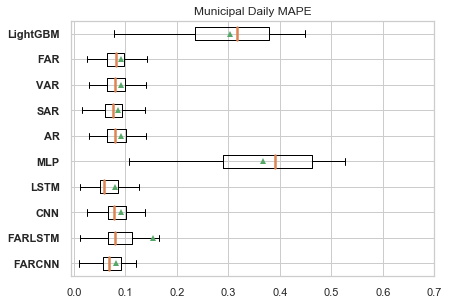

In [76]:
box_plots(results,'Daily')